## Downloading the repository

In [1]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2  # updated repository

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004
Receiving objects: 100% (1004/1004), 137.72 MiB | 19.21 MiB/s, done.
Resolving deltas: 100% (588/588), done.
Updating files: 100% (76/76), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/work/dl_Material/PyCharm/video_functions.py ./Mask_RCNN-TF2/mrcnn

In [4]:
%cd /content/Mask_RCNN-TF2

/content/Mask_RCNN-TF2


In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.1/293.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 14.8 MB/s eta 0:00:00


In [6]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separ

In [10]:
!pip install numpy==1.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.0 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.0 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.0 which is incompatible.


In [15]:
%cd ..

/content


## Importing the libraries

In [2]:
import os
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
np.__version__

'1.23.0'

In [4]:
tf.__version__

'2.15.0'

In [5]:
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2')
ROOT_DIR

'/content/Mask_RCNN-TF2'

In [6]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [7]:
sys.path.append(ROOT_DIR)

In [17]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/']

In [13]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [18]:
!pip install pycocotools


In [30]:
import coco

In [31]:
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))

In [32]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/']

In [33]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

In [34]:
MODEL_DIR, IMAGE_DIR

('/content/Mask_RCNN-TF2/logs', '/content/Mask_RCNN-TF2/images')

### [ ! ] Compatibility Update
Run the 5 lines below so we don't have any issues when running with the latest versions of Tensorflow

In [35]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## Loading the pre-trained neural network

In [36]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

In [37]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [38]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [39]:
config = InferenceConfig()

In [40]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [41]:
MODEL_DIR

'/content/Mask_RCNN-TF2/logs'

In [42]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

Instructions for updating:
Use fn_output_signature instead


In [43]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

## Detecting objects

In [44]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

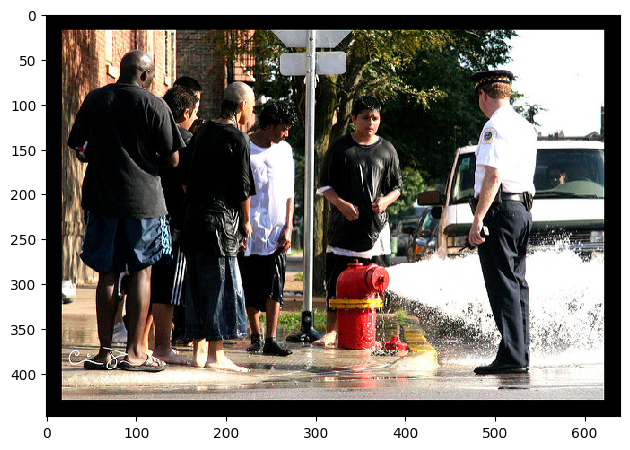

In [45]:
image= skimage.io.imread('/content/Mask_RCNN-TF2/images/1045023827_4ec3e8ba5c_z.jpg')
skimage.io.imshow('/content/Mask_RCNN-TF2/images/1045023827_4ec3e8ba5c_z.jpg')

In [46]:
results = network.detect([image], verbose=0)
results

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[ 39,  24, 398, 149],
         [ 56, 466, 404, 549],
         [ 76, 142, 400, 235],
         [ 99, 213, 387, 278],
         [ 87, 301, 362, 400],
         [268, 313, 372, 384],
         [167, 552, 196, 581],
         [ 77, 133, 134, 171],
         [ 80, 120, 377, 167],
         [228, 388, 275, 414],
         [216, 400, 279, 437],
         [222,  96, 278, 140]], dtype=int32),
  'class_ids': array([ 1,  1,  1,  1,  1, 11,  1,  1,  1,  3,  3, 27], dtype=int32),
  'scores': array([0.9995989 , 0.9995276 , 0.99949074, 0.9991345 , 0.9986952 ,
         0.9977805 , 0.90926677, 0.89982164, 0.8837504 , 0.8815922 ,
         0.8413673 , 0.7568563 ], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
   

In [47]:
r = results[0]

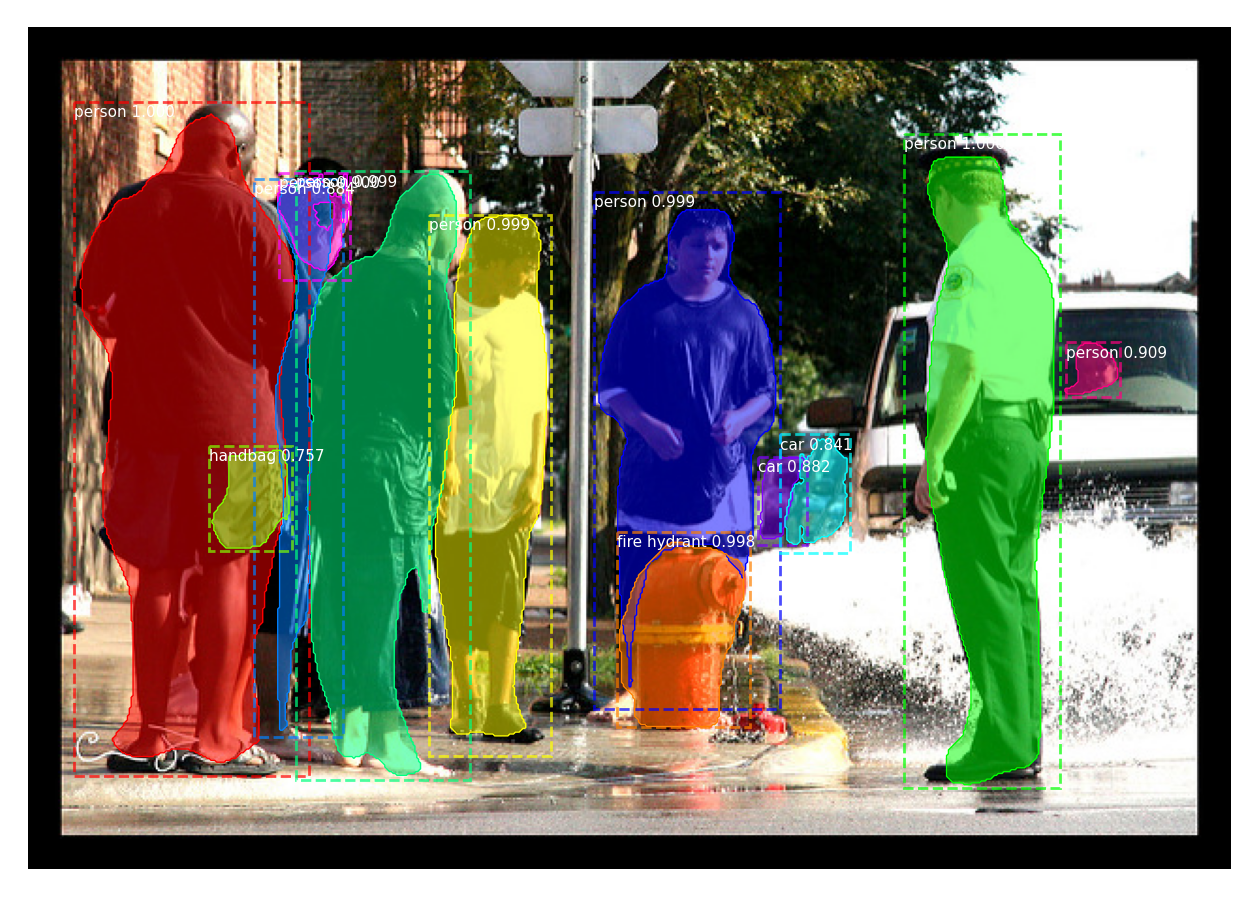

In [48]:
visualize.display_instances(image, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

## Removing the background

In [49]:
r['masks']

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [50]:
def segment(image, r, index):
  mask = r['masks'][:,:,index]
  #print(mask)
  #print(mask.shape)

  mask = np.stack((mask,) * 3, axis = -1)
  #print(mask)
  #print(mask.shape)

  mask = mask.astype('uint8')
  #print(mask)
  bg = 255 - mask * 255
  #print(mask, mask.min(), mask.max())

  mask_show = np.invert(bg)
  #print(mask_show)
  mask_img = image * mask
  #print(mask_img)

  result = mask_img + bg
  return result, mask_show

In [51]:
image.shape, 425 * 640

((448, 640, 3), 272000)

In [52]:
segmentation, mask_obj = segment(image, r, 0)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
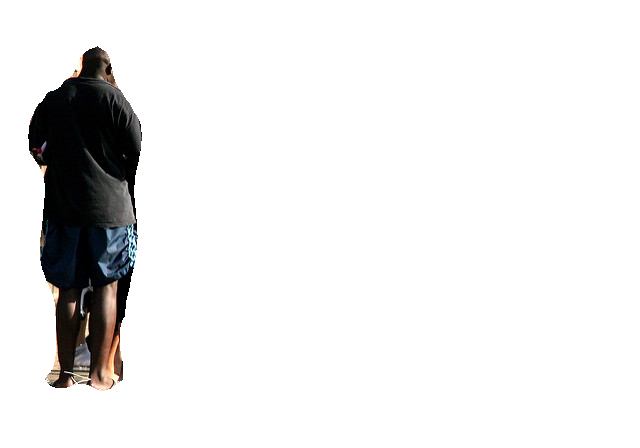

In [53]:
segmentation

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
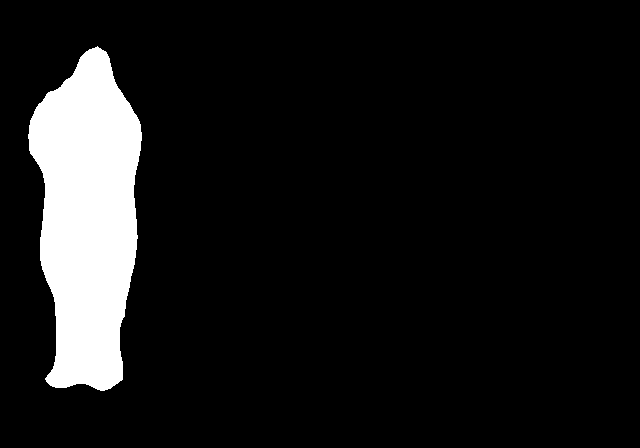

In [54]:
mask_obj

In [55]:
def show_segment(image, r, index, show_mask = False):
  segmentation, mask_obj = segment(image, r, index)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))
  else:
    plt.imshow(np.concatenate([image, segmentation], axis = 1))

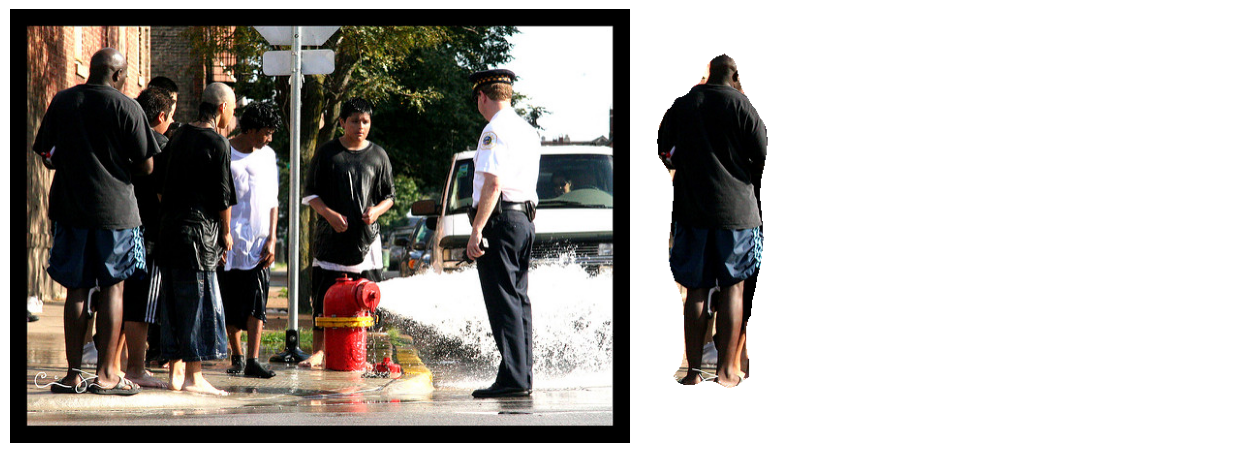

In [56]:
show_segment(image, r, 0, False)

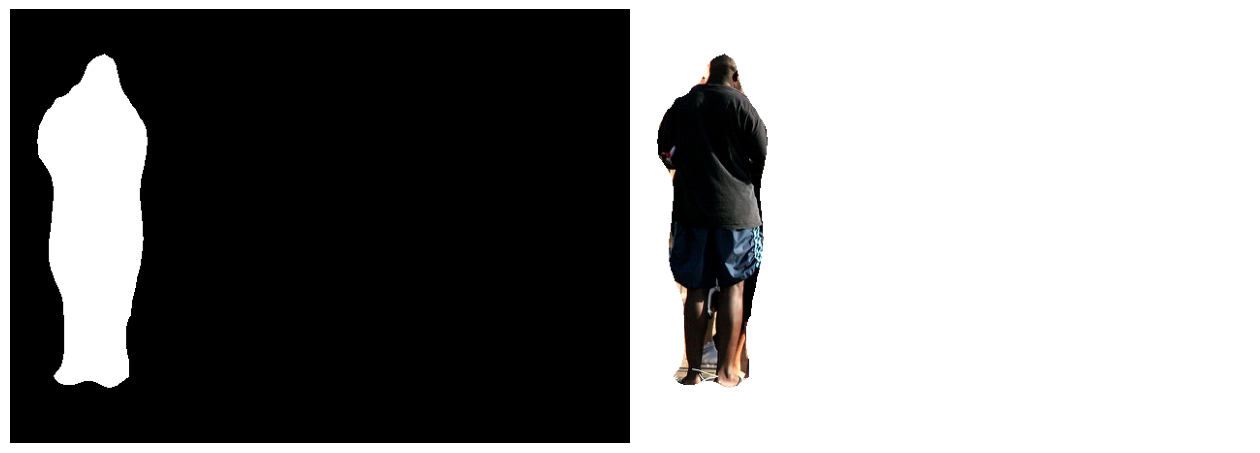

In [57]:
show_segment(image, r, 0, True)

In [58]:
r['rois'], len(r['rois'])

(array([[ 39,  24, 398, 149],
        [ 56, 466, 404, 549],
        [ 76, 142, 400, 235],
        [ 99, 213, 387, 278],
        [ 87, 301, 362, 400],
        [268, 313, 372, 384],
        [167, 552, 196, 581],
        [ 77, 133, 134, 171],
        [ 80, 120, 377, 167],
        [228, 388, 275, 414],
        [216, 400, 279, 437],
        [222,  96, 278, 140]], dtype=int32),
 12)

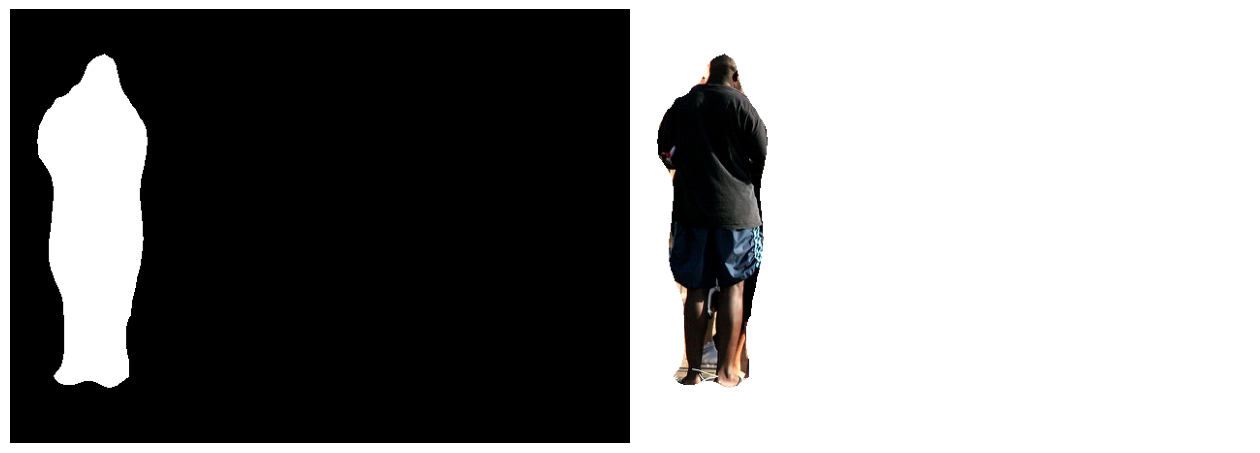

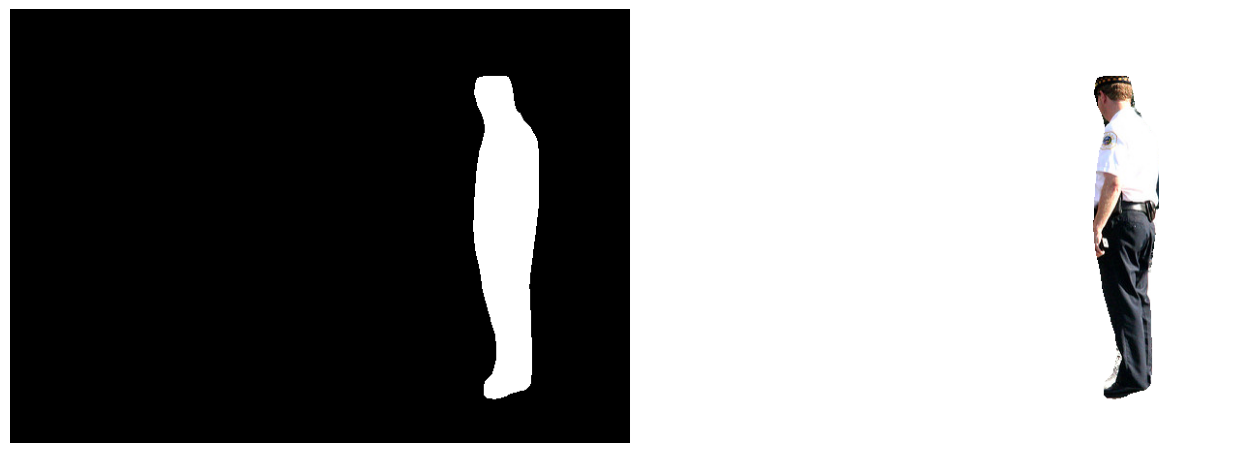

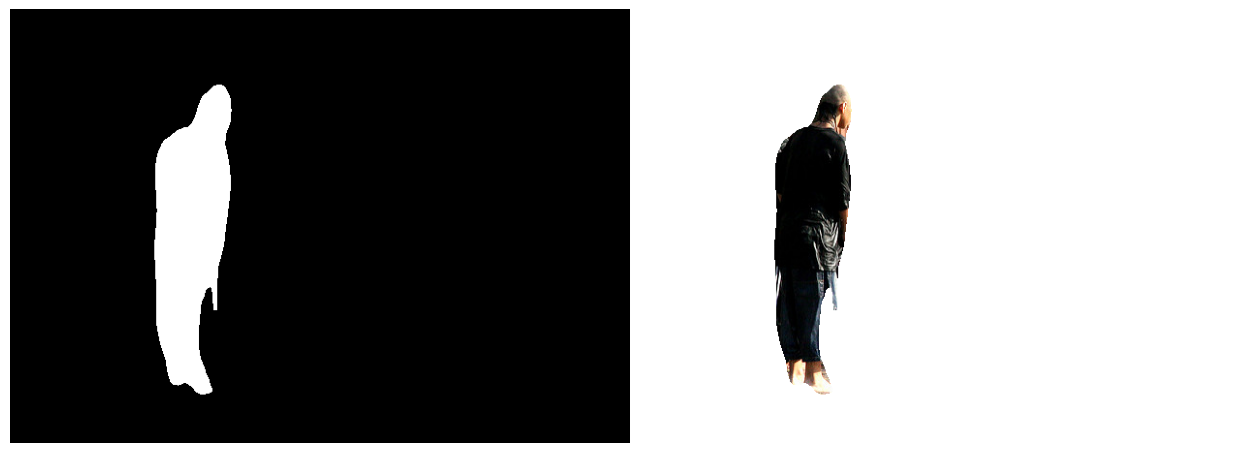

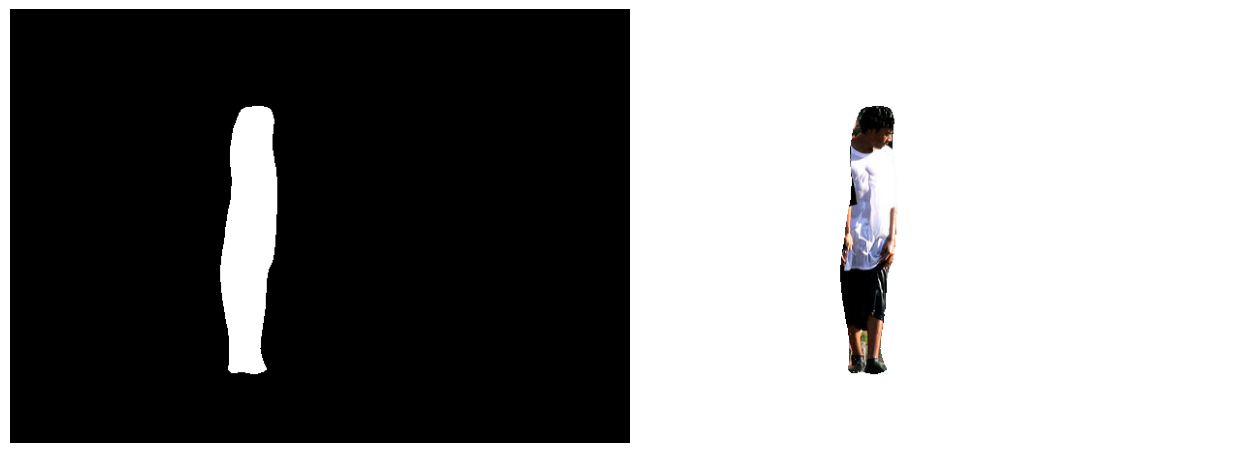

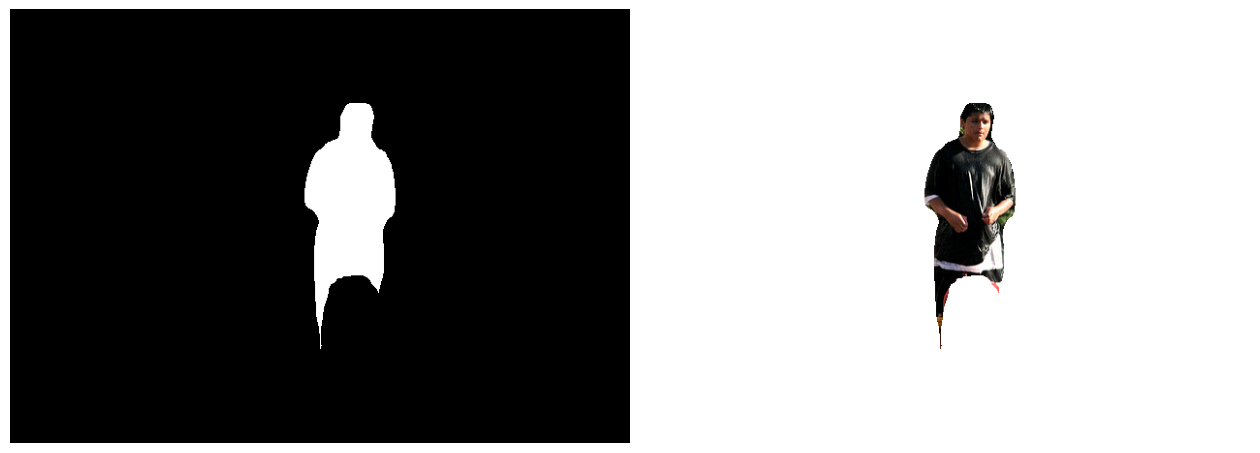

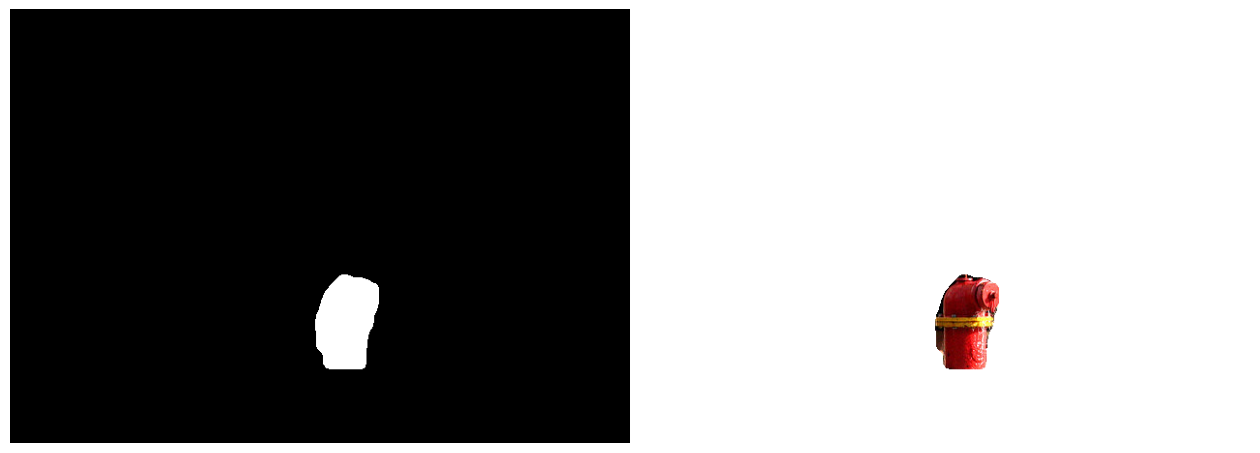

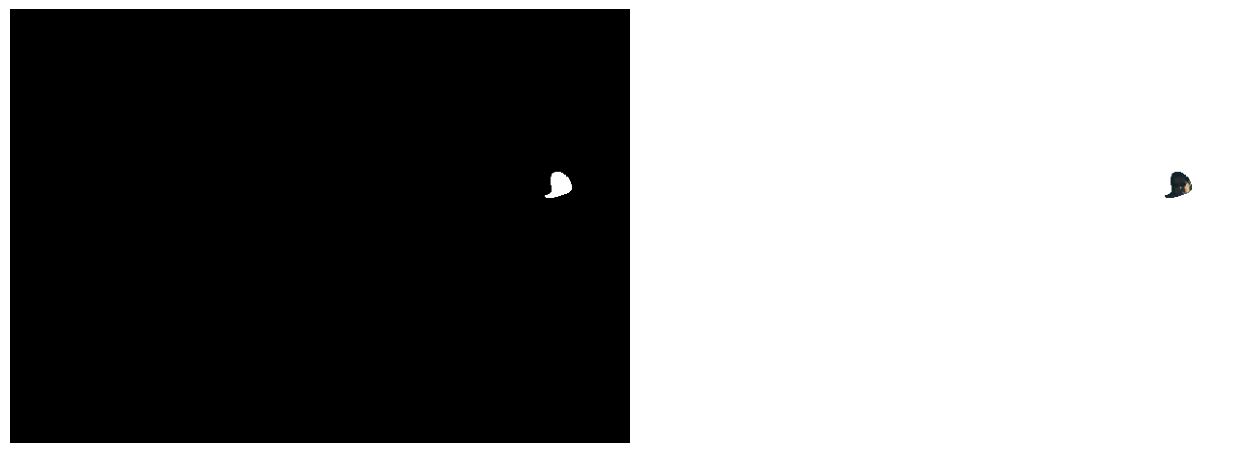

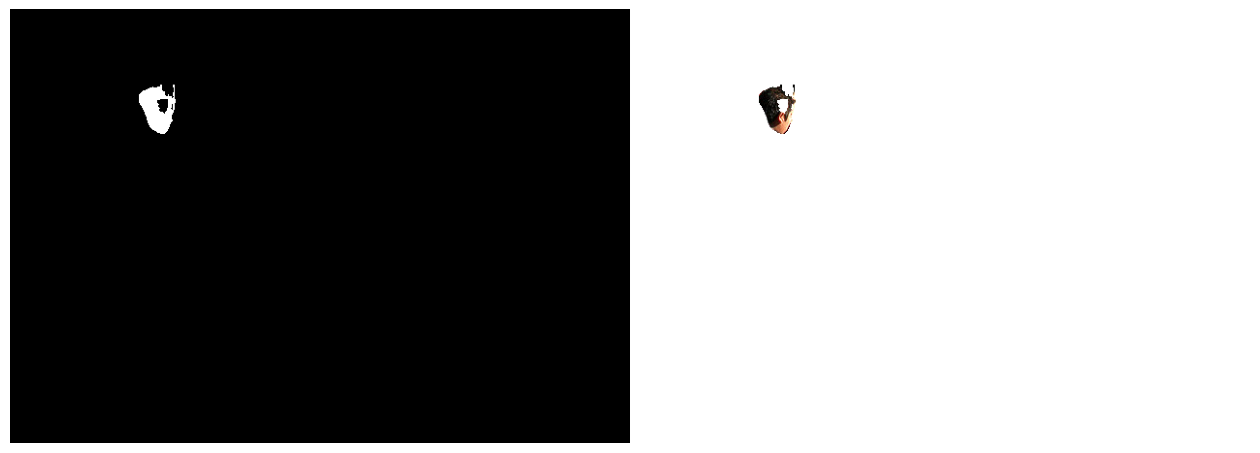

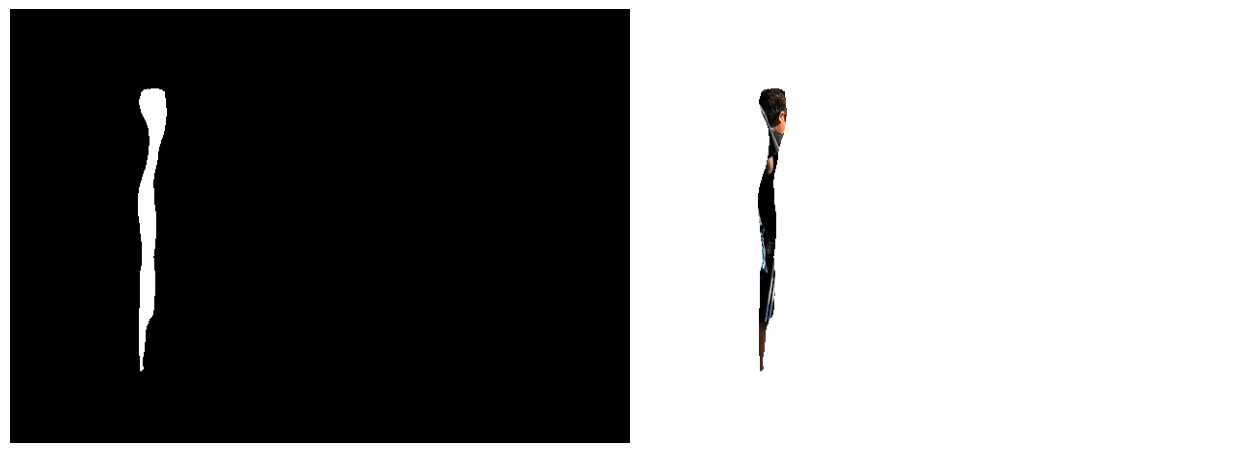

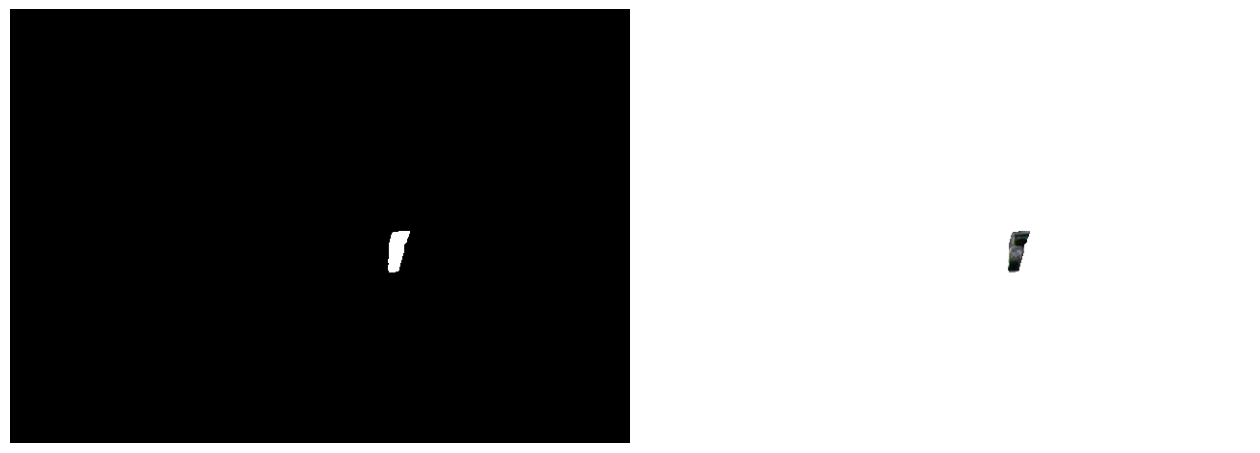

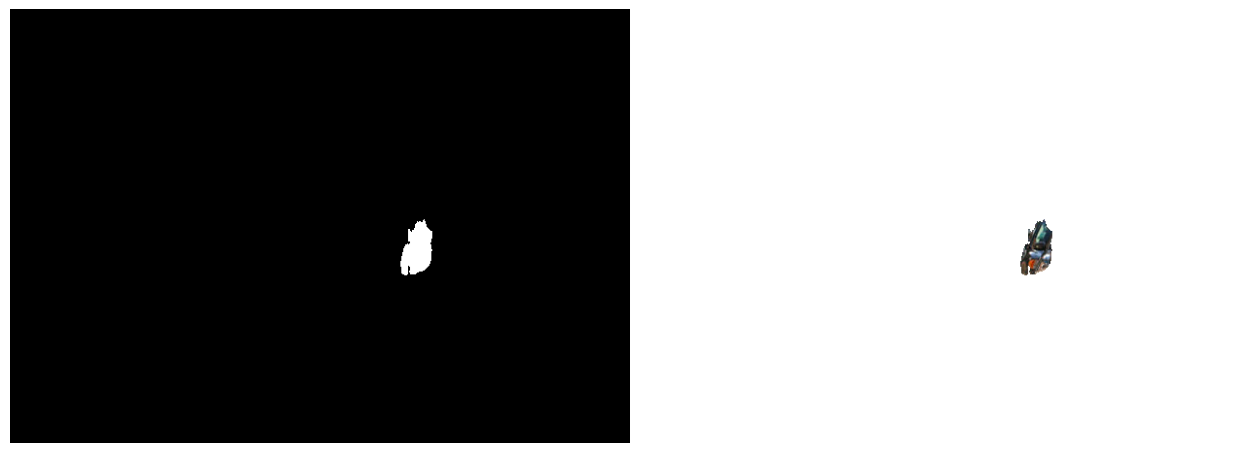

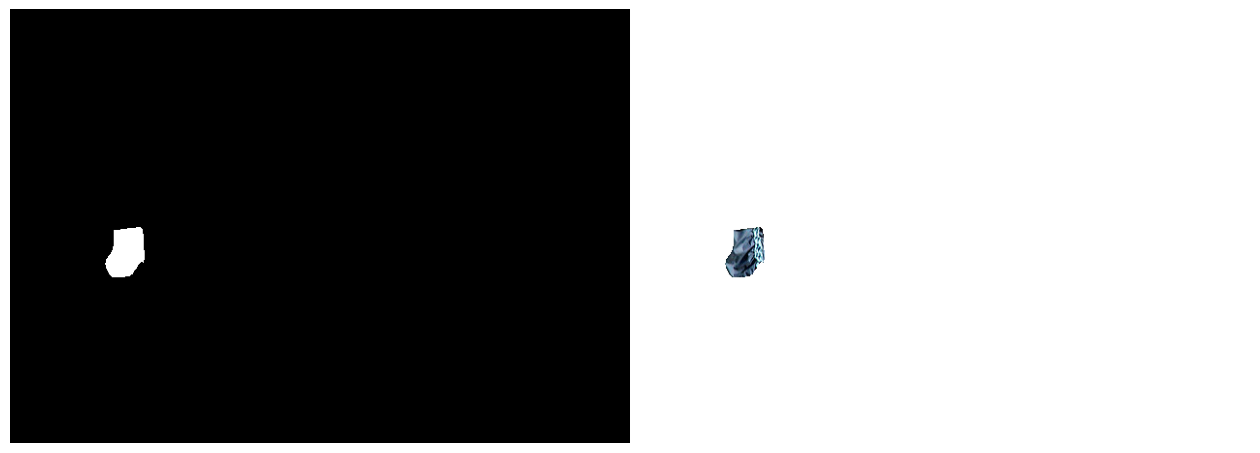

In [59]:
for index in range(len(r['rois'])):
  show_segment(image, r, index, True)

## Segmentation in videos

In [63]:
capture = cv2.VideoCapture('/content/drive/MyDrive/work/dl_Material/Videos/video_street.mp4')
connected, frame = capture.read()
connected

True

In [64]:
frame.shape

(1080, 1920, 3)

In [65]:
save_video = cv2.VideoWriter('/content/drive/MyDrive/work/dl_Material/Videos/video_street.mp4',
                             cv2.VideoWriter_fourcc(*'XVID'), 24, (frame.shape[1], frame.shape[0]))

In [66]:
from mrcnn import video_functions

In [67]:
colors = video_functions.random_colors(len(class_names), 55)
len(colors)

81

In [68]:
print(colors)

[(0.518518518518519, 0.0, 1.0), (1.0, 0.0, 0.14814814814814792), (0.37037037037037046, 1.0, 0.0), (0.0, 1.0, 0.5185185185185182), (1.0, 0.0, 0.5925925925925926), (1.0, 0.0, 0.518518518518519), (1.0, 0.0, 0.7407407407407405), (1.0, 0.5925925925925926, 0.0), (0.0, 1.0, 0.2962962962962963), (0.0, 1.0, 0.7407407407407405), (0.6666666666666667, 1.0, 0.0), (1.0, 0.07407407407407407, 0.0), (0.5925925925925926, 0.0, 1.0), (0.0, 0.5185185185185182, 1.0), (0.0, 1.0, 0.4444444444444442), (0.8888888888888884, 0.0, 1.0), (0.8888888888888888, 1.0, 0.0), (0.0, 0.8888888888888893, 1.0), (1.0, 0.2962962962962963, 0.0), (0.0, 0.2962962962962967, 1.0), (0.0740740740740744, 0.0, 1.0), (0.9629629629629628, 0.0, 1.0), (0.22222222222222232, 0.0, 1.0), (0.7407407407407409, 1.0, 0.0), (1.0, 0.6666666666666666, 0.0), (0.0, 1.0, 0.22222222222222232), (0.0, 1.0, 0.07407407407407396), (0.0, 1.0, 0.5925925925925926), (0.0, 0.44444444444444464, 1.0), (0.0, 0.8148148148148149, 1.0), (1.0, 0.5185185185185185, 0.0), (0

In [69]:
def show(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [70]:
frame_show = 20
current_frame = 0

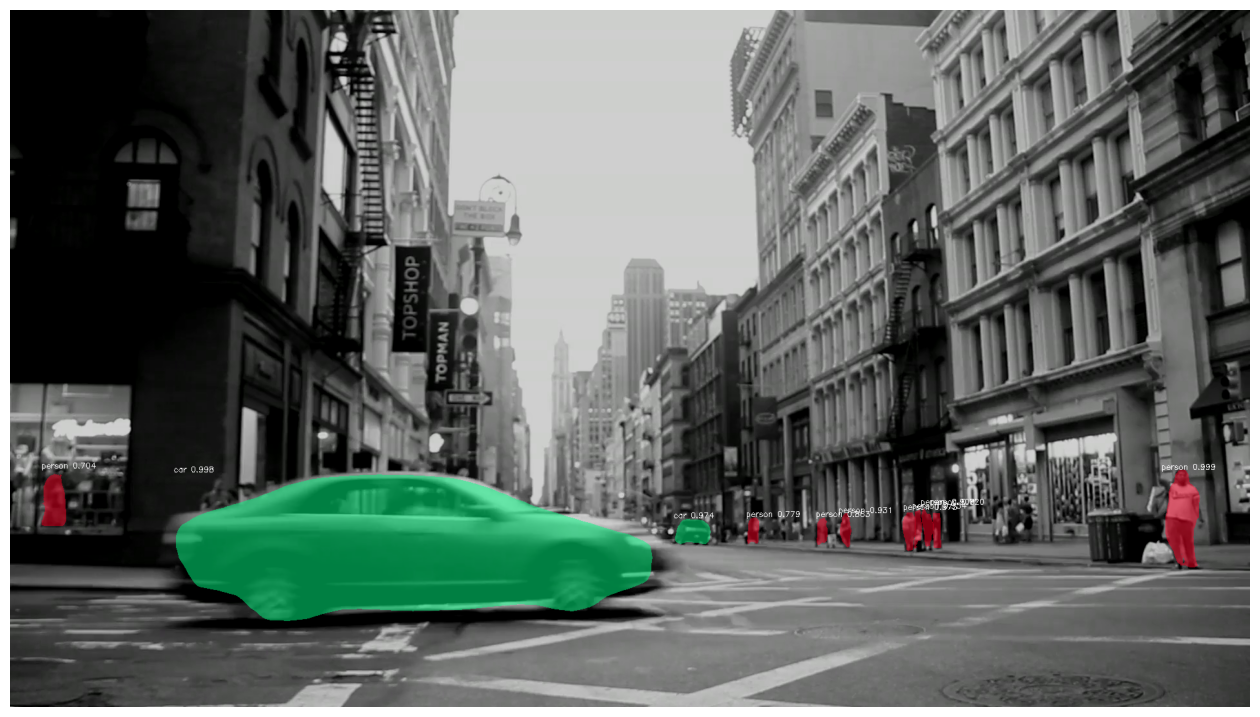

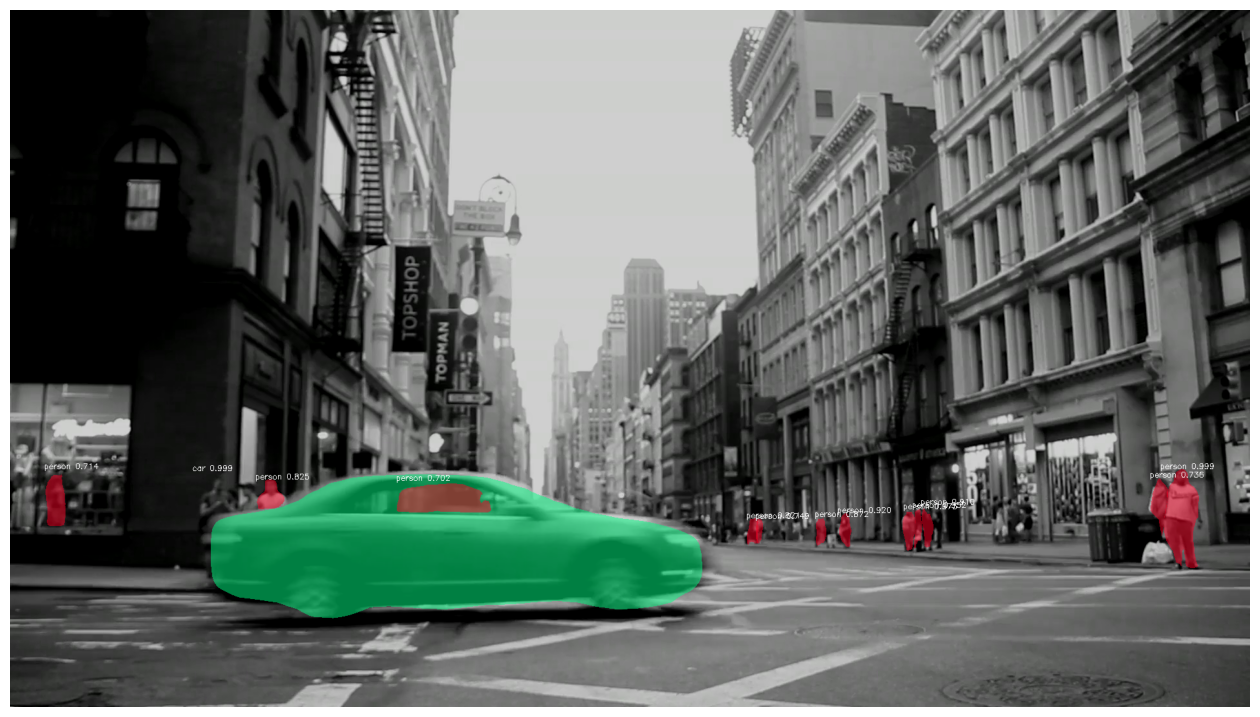

In [71]:
while (cv2.waitKey(1) < 0):
  connected, frame = capture.read()

  if not connected:
    break

  results = network.detect([frame], verbose=0)
  r = results[0]

  processed_frame = video_functions.display_instances(frame, r['rois'], r['masks'],
                                                      r['class_ids'], class_names, r['scores'], colors=colors)

  if current_frame <= frame_show:
    show(processed_frame)
    current_frame += 1

  save_video.write(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
save_video.release()